# **Multi layer perceptron (MLP)**
* For regression task \\
In this section we 're going to investigate benefits and challenges of using a MLP for interpolate a simple function.





In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Generate data 
Define a sine function and generate data for training a regression model

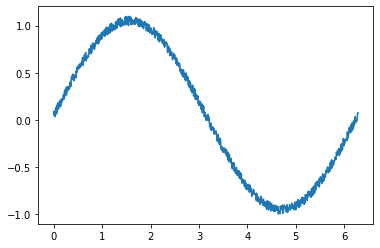

In [ ]:
x = np.linspace(0,2*np.pi, 1000)
y = np.sin(x) + 0.1*np.random.rand(1000)
plt.plot(x,y)

Split train and test data (80% for training and 20% for test)

In [ ]:
import random
indeces = list(range(1000))
random.seed(0)
random.shuffle(indeces)
train_x = x[indeces[:int(0.8*len(x))]]
train_y = y[indeces[:int(0.8*len(y))]]

test_x = x[indeces[int(0.8*len(x)):]]
test_y = y[indeces[int(0.8*len(y)):]]

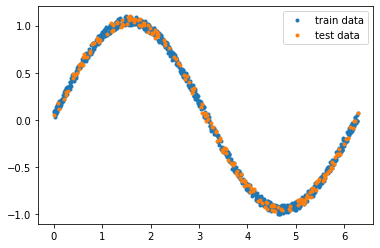

In [ ]:
plt.plot(train_x,train_y,'.')
plt.plot(test_x, test_y,'.')
plt.legend(['train data', 'test data'])

## ***Define model*** 
In this section we define a function for generate a MLP model with various `Activation Functions` to probe its effects on a regression task.

In [ ]:
def get_mlp_regression(activation='tanh'):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(1,)))
  model.add(tf.keras.layers.Dense(2, activation=activation))
  model.add(tf.keras.layers.Dense(4, activation=activation))
  model.add(tf.keras.layers.Dense(2, activation=activation))
  model.add(tf.keras.layers.Dense(1,))
  return model

### tanh 
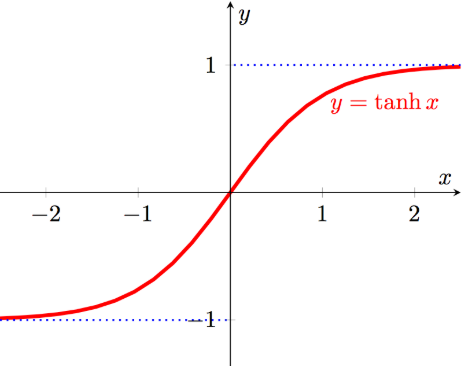

In [ ]:
tanh_model = get_mlp_regression(activation='tanh')

**See model details** \\
There are two common ways to visualize model details:


1.   model.summary()
2.   use plot_model 



In [ ]:
tanh_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


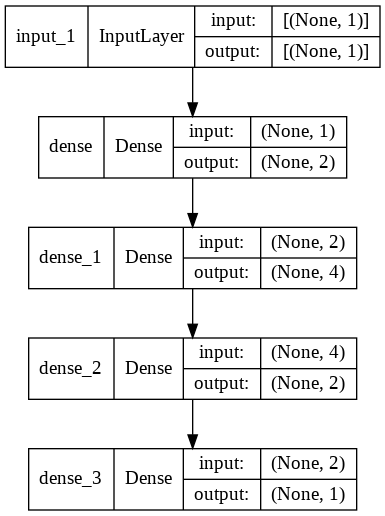

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(tanh_model, 'model.png', show_shapes=True)

## Complie and train the model

In [ ]:
tanh_model.compile(optimizer = "Adam",
              loss="mse")

In [ ]:
tanh_results = tanh_model.fit(train_x,train_y, epochs = 100, batch_size=4)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4506
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.1602
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1458
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1375
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1279
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1197
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1010
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 12/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 13/100


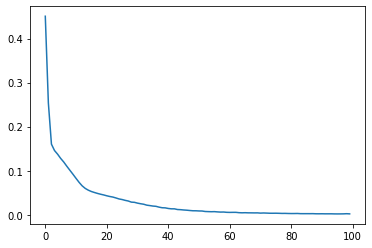

In [ ]:
plt.plot(tanh_results.history['loss'])

In [ ]:
tanh_model.predict((np.pi/2,))

array([[1.0652872]], dtype=float32)

MSE 0.0016607374416269527


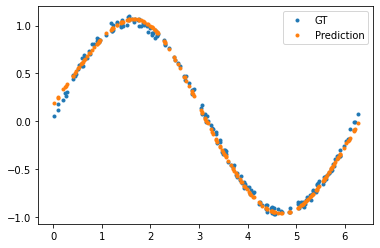

In [ ]:
y_pred = tanh_model.predict(test_x)
plt.plot(test_x,test_y,'.')
plt.plot(test_x,y_pred,'.')
plt.legend(['GT', 'Prediction'])
print('MSE', np.mean((y_pred.transpose()-test_y)**2))

## Different Activations
Train same model with different activation functions

In [ ]:
def compile_train(model):
  model.compile(optimizer = "Adam",
              loss="mse")
  results = model.fit(train_x,train_y, epochs = 100, batch_size=4)
  return model, results

### Sigmoid
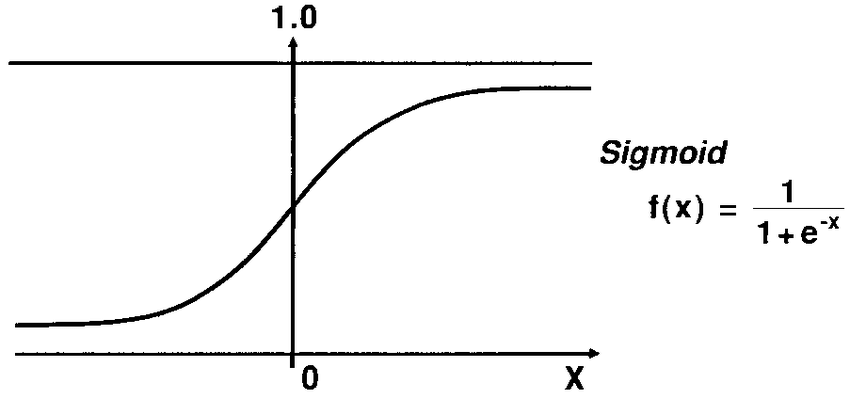

In [ ]:
sig_model = get_mlp_regression(activation='sigmoid')
sig_model, sig_results = compile_train(sig_model)

### ReLU (Rectified Linear Unit)
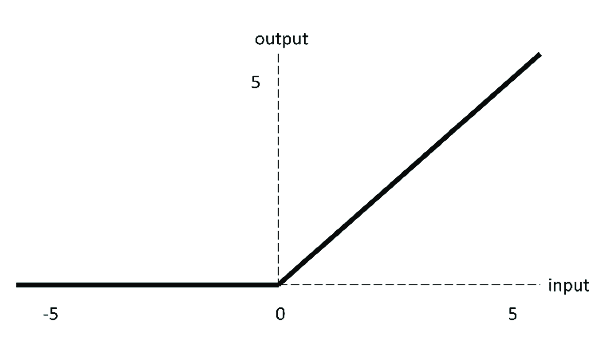

In [ ]:
relu_model = get_mlp_regression(activation='relu')
relu_model, relu_results = compile_train(relu_model)

## Plots and Discussion


*   plot all learning curves together
*   plot GT and predictions
*   MSE assessment



Text(0.5, 1.0, 'learning curves')

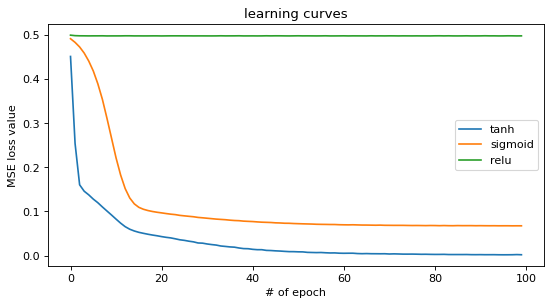

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 4), dpi=80)
plt.plot(tanh_results.history['loss'])
plt.plot(sig_results.history['loss'])
plt.plot(relu_results.history['loss'])
plt.legend(['tanh', 'sigmoid', 'relu'])
plt.ylabel('MSE loss value')
plt.xlabel('# of epoch')
plt.title('learning curves')

Text(0, 0.5, 'y')

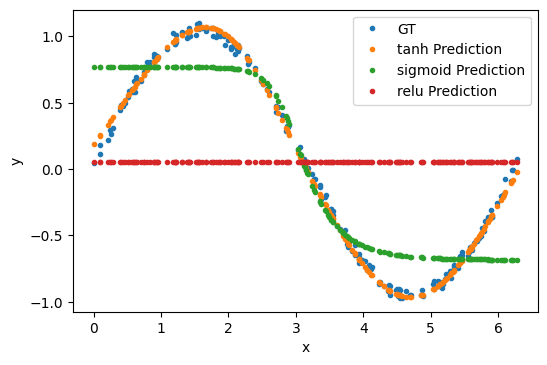

In [ ]:
tanh_pred = tanh_model.predict(test_x)
sig_pred = sig_model.predict(test_x)
relu_pred = relu_model.predict(test_x)

figure(figsize=(6,4), dpi=100)
plt.plot(test_x,test_y,'.')
plt.plot(test_x,tanh_pred,'.')
plt.plot(test_x,sig_pred,'.')
plt.plot(test_x,relu_pred,'.')
plt.legend(['GT', 'tanh Prediction', 'sigmoid Prediction', 'relu Prediction'])
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
print('tanh MSE: ', np.mean((tanh_pred.transpose()-test_y)**2))
print('sigmoid MSE: ', np.mean((sig_pred.transpose()-test_y)**2))
print('relu MSE: ', np.mean((relu_pred.transpose()-test_y)**2))

tanh MSE:  0.0016607374416269527
sigmoid MSE:  0.057722405934878776
relu MSE:  0.5065061817254797


## Out of range check
If a regression model has been trained on limited data we don't expect generalization on out of training range data.

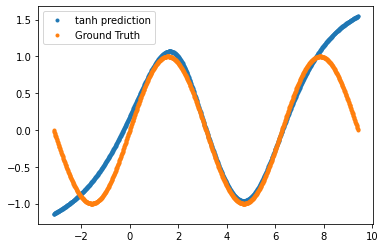

In [ ]:
or_x = np.linspace(-np.pi,3*np.pi, 1000)
or_y = np.sin(or_x)
tanh_pred_or = tanh_model.predict(or_x)
plt.plot(or_x,tanh_pred_or,'.')
plt.plot(or_x,or_y,'.')
plt.legend(['tanh prediction', 'Ground Truth'])

# **Mnist classification using MLP**
In this section we provide a MLP model for classification task on hand-written numbers (MNIST Dataset) 

## load and visualize dataset


*   tensorflow/keras provides some common datasets easy to use ...
*   we download the dataset and perfor preprocessings on it.



In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


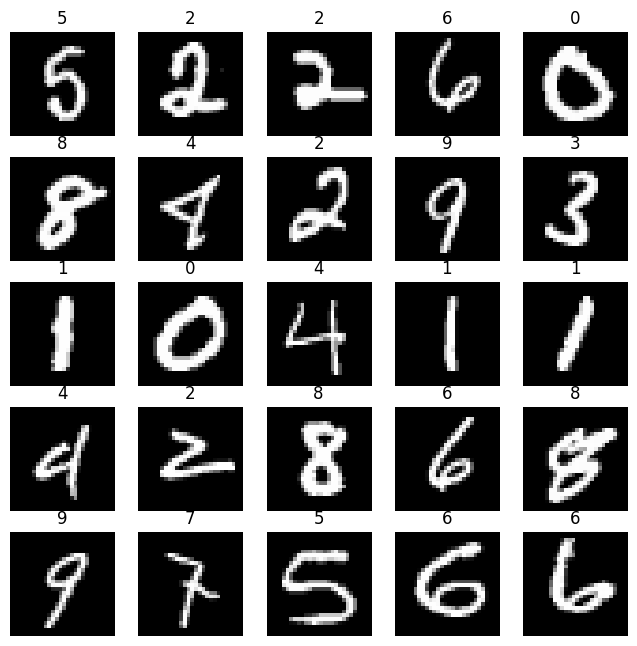

In [ ]:
import random
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(8,8), dpi=100)
for i in range(25):
  plt.subplot(5, 5, i+1)
  numm = random.randint(0,60000)
  plt.imshow(x_train[numm], cmap='gray')
  plt.axis('off')
  plt.title(str(y_train[numm]))

## Preprocessing 
  normalization and one-hot labels

In [ ]:
print('maximum value of dataset: ', x_train.max())
print('shape of training dataset: ', x_train.shape)
print('shape of test dataset: ', x_test.shape)

maximum value of dataset:  255
shape of training dataset:  (60000, 28, 28)
shape of test dataset:  (10000, 28, 28)


In [ ]:
# normalize to maximum value 
norm_x_train = x_train/255.0
norm_x_test = x_test/255.0

In [ ]:
flatten_train_x = norm_x_train.reshape([norm_x_train.shape[0],-1])
flatten_test_x = norm_x_test.reshape([norm_x_test.shape[0],-1])

print('new shape for training: {} and test: {}'.format(flatten_train_x.shape, flatten_test_x.shape))

new shape for training: (60000, 784) and test: (10000, 784)


## Train-Validation split
we split our train data to validation and training. validation data help us in training stage for choosing best model.

In [ ]:
from sklearn.model_selection import train_test_split
train_img, val_img, train_lab, val_lab = train_test_split(flatten_train_x, y_train, test_size=0.1, random_state=100)

In [ ]:
# onehot_test = tf.one_hot(y_test,10)
onehot_train = tf.one_hot(train_lab,10)
onehot_val = tf.one_hot(val_lab,10)

print('Shape -> before one-hot: {}, after one-hot: {}'.format(train_lab.shape, onehot_train.shape))

Shape -> before one-hot: (54000,), after one-hot: (54000, 10)


## Define MLP model for classification

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import *

Hint:
For designing a neural network with batch normalization and dropout we should consider the following rule. \\
-> CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC ->

In [ ]:
def fc_layer(inp, n_fc, batch_norm=False):
  x = Dense(n_fc, kernel_initializer='he_normal')(inp)
  if batch_norm:
    x = BatchNormalization()(x)
  out = Activation("relu")(x)
  return out

In [ ]:
def get_classification_mlp(drop=False, batch_norm=False, d_val = 0.1):
  inp = Input((28*28,), name='img')
  x = fc_layer(inp, 512, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)
  
  x = x = fc_layer(x, 256, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 256, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 256, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 128, batch_norm=batch_norm)  
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 128, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)


  x = fc_layer(x, 64, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 64, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = fc_layer(x, 32, batch_norm=batch_norm)
  if drop:
    x = Dropout(d_val)(x)

  x = Dense(10, activation='softmax')(x)
  model = Model(inputs=[inp], outputs=[x])
  return model


### Dropout: off, Batchnormalization: off

In [ ]:
simple_model = get_classification_mlp(drop=False, batch_norm=False)
simple_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 784)]             0         
                                                                 
 dense_72 (Dense)            (None, 512)               401920    
                                                                 
 activation_55 (Activation)  (None, 512)               0         
                                                                 
 dense_73 (Dense)            (None, 256)               131328    
                                                                 
 activation_56 (Activation)  (None, 256)               0         
                                                                 
 dense_74 (Dense)            (None, 256)               65792     
                                                                 
 activation_57 (Activation)  (None, 256)               0   

## Train and evauate simple model 

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5)
simple_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
simp_result = simple_model.fit(train_img,onehot_train, batch_size=64,
                               epochs=50,  validation_data=(val_img, onehot_val),
                               callbacks=[es])

Epoch 1/50
844/844 [==============================] - 4s 4ms/step - loss: 0.0553 - accuracy: 0.9050 - val_loss: 0.0236 - val_accuracy: 0.9603
Epoch 2/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0204 - accuracy: 0.9675 - val_loss: 0.0207 - val_accuracy: 0.9657
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 0.0144 - accuracy: 0.9773 - val_loss: 0.0297 - val_accuracy: 0.9563
Epoch 4/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0112 - accuracy: 0.9831 - val_loss: 0.0182 - val_accuracy: 0.9730
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.9849 - val_loss: 0.0204 - val_accuracy: 0.9723
Epoch 6/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0089 - accuracy: 0.9860 - val_loss: 0.0150 - val_accuracy: 0.9775
Epoch 7/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0081 - accuracy: 0.9877 - val_loss: 0.0164 - val_accuracy: 0.9782
Epoch 

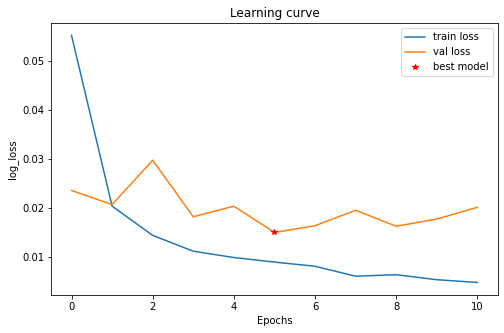

In [ ]:
import numpy as np
plt.figure(figsize=(8,5))
plt.title("Learning curve")
plt.plot(simp_result.history["loss"], label="loss")
plt.plot(simp_result.history["val_loss"], label="val_loss")
plt.plot(np.argmin(np.array(simp_result.history["val_loss"])),np.min(np.array(simp_result.history["val_loss"])), 'r*')
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend(['train loss', 'val loss', 'best model'])

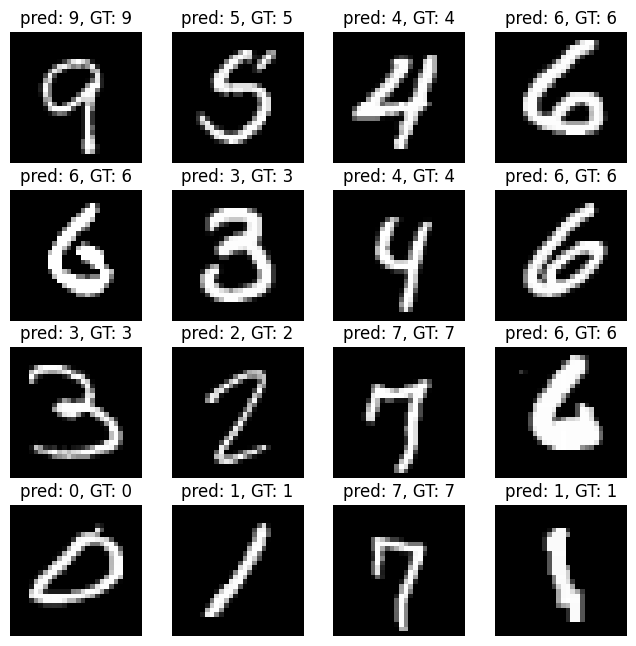

In [ ]:
figure(figsize=(8,8), dpi=100)
for i in range(16):
  index = random.randint(0,len(flatten_test_x))
  prediction = simple_model.predict(np.expand_dims(flatten_test_x[index],axis=0))
  predicted_num = np.argmax(prediction)
  plt.subplot(4,4,i+1)
  plt.imshow(x_test[index], cmap='gray')
  plt.axis('off')
  plt.title('pred: {}, GT: {}'.format(predicted_num, y_test[index]))

In [ ]:
simple_prediction = simple_model.predict(flatten_test_x)

In [ ]:
simple_predicted_num = np.argmax(simple_prediction,axis=1)

In [ ]:
tp = 0
for i in range(len(simple_predicted_num)):
  if (simple_predicted_num[i] == y_test[i]):
    tp +=1

print('accuracy on test data: ', tp/len(simple_predicted_num))

accuracy on test data:  0.9765


## Effects of adding dropout and batchnorm
As we defined MLP model for MNIST classification, some fuse-bits used for turning On/Off batchnormalization and dropout regularization term. \\
in following section we probe the effects and benefits of these terms in training and test stages.

In [ ]:
# define useful functions to prevent repeat the same codes
def compile_train_mlp_classifier(model):
  es = EarlyStopping(monitor='val_loss', patience=5)
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  result = model.fit(train_img,onehot_train, batch_size=64,
                               epochs=50,  validation_data=(val_img, onehot_val),
                               callbacks=[es])
  return model, result

def test_accuracy(model):
  prediction = model.predict(flatten_test_x)
  predicted_num = np.argmax(prediction,axis=1)
  tp = 0
  for i in range(len(predicted_num)):
    if (predicted_num[i] == y_test[i]):
      tp +=1

  print('accuracy on test data: ', tp/len(predicted_num))

def learning_curve_plot(result):
  plt.figure(figsize=(8,5))
  plt.title("Learning curve")
  plt.plot(result.history["loss"], label="loss")
  plt.plot(result.history["val_loss"], label="val_loss")
  plt.plot(np.argmin(np.array(result.history["val_loss"])),np.min(np.array(result.history["val_loss"])), 'r*')
  plt.xlabel("Epochs")
  plt.ylabel("log_loss")
  plt.legend(['train loss', 'val loss', 'best model'])

### Dropout: on, Batchnormalization: off

In [ ]:
drop_model = get_classification_mlp(drop=True, batch_norm=False)
drop_model, drop_result = compile_train_mlp_classifier(drop_model)

Epoch 1/50
844/844 [==============================] - 5s 4ms/step - loss: 0.1000 - accuracy: 0.8347 - val_loss: 0.0305 - val_accuracy: 0.9557
Epoch 2/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.9554 - val_loss: 0.0245 - val_accuracy: 0.9633
Epoch 3/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9664 - val_loss: 0.0197 - val_accuracy: 0.9707
Epoch 4/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0206 - accuracy: 0.9721 - val_loss: 0.0196 - val_accuracy: 0.9745
Epoch 5/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0173 - accuracy: 0.9763 - val_loss: 0.0194 - val_accuracy: 0.9760
Epoch 6/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0160 - accuracy: 0.9773 - val_loss: 0.0205 - val_accuracy: 0.9760
Epoch 7/50
844/844 [==============================] - 3s 4ms/step - loss: 0.0143 - accuracy: 0.9809 - val_loss: 0.0168 - val_accuracy: 0.9745
Epoch 

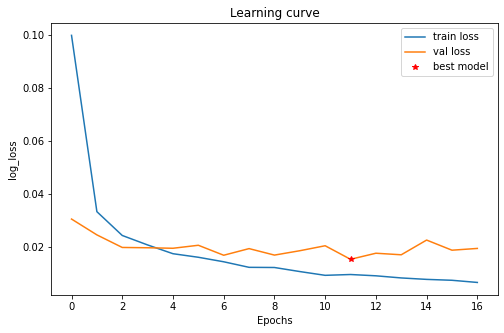

In [ ]:
learning_curve_plot(drop_result)

In [ ]:
test_accuracy(drop_model)

accuracy on test data:  0.9813


### Dropout: off, Batchnormalization: on

In [ ]:
batch_model = get_classification_mlp(drop=False, batch_norm=True)
batch_model, batch_result = compile_train_mlp_classifier(batch_model)

Epoch 1/50
844/844 [==============================] - 10s 9ms/step - loss: 0.1006 - accuracy: 0.8876 - val_loss: 0.0278 - val_accuracy: 0.9583
Epoch 2/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0297 - accuracy: 0.9554 - val_loss: 0.0206 - val_accuracy: 0.9695
Epoch 3/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0214 - accuracy: 0.9667 - val_loss: 0.0161 - val_accuracy: 0.9748
Epoch 4/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0171 - accuracy: 0.9742 - val_loss: 0.0149 - val_accuracy: 0.9757
Epoch 5/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0141 - accuracy: 0.9774 - val_loss: 0.0168 - val_accuracy: 0.9742
Epoch 6/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0124 - accuracy: 0.9806 - val_loss: 0.0143 - val_accuracy: 0.9778
Epoch 7/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0114 - accuracy: 0.9821 - val_loss: 0.0147 - val_accuracy: 0.9780
Epoch

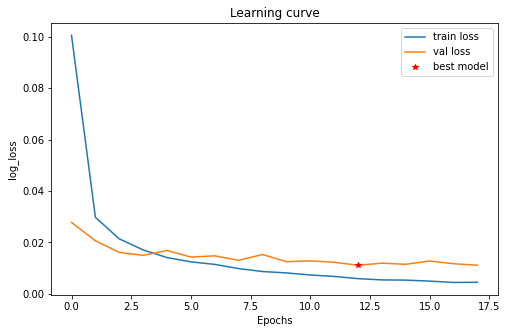

In [ ]:
learning_curve_plot(batch_result)

In [ ]:
test_accuracy(batch_model)

accuracy on test data:  0.9827


### Dropout: on, Batchnormalization: on

In [ ]:
drop_batch_model = get_classification_mlp(drop=True, batch_norm=True)
drop_batch_model, drop_batch_result = compile_train_mlp_classifier(drop_batch_model)

Epoch 1/50
844/844 [==============================] - 11s 10ms/step - loss: 0.1635 - accuracy: 0.8126 - val_loss: 0.0324 - val_accuracy: 0.9523
Epoch 2/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0462 - accuracy: 0.9377 - val_loss: 0.0213 - val_accuracy: 0.9680
Epoch 3/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0343 - accuracy: 0.9523 - val_loss: 0.0194 - val_accuracy: 0.9707
Epoch 4/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0276 - accuracy: 0.9612 - val_loss: 0.0226 - val_accuracy: 0.9678
Epoch 5/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0249 - accuracy: 0.9645 - val_loss: 0.0181 - val_accuracy: 0.9738
Epoch 6/50
844/844 [==============================] - 8s 9ms/step - loss: 0.0215 - accuracy: 0.9696 - val_loss: 0.0149 - val_accuracy: 0.9778
Epoch 7/50
844/844 [==============================] - 7s 9ms/step - loss: 0.0194 - accuracy: 0.9724 - val_loss: 0.0138 - val_accuracy: 0.9785
Epoc

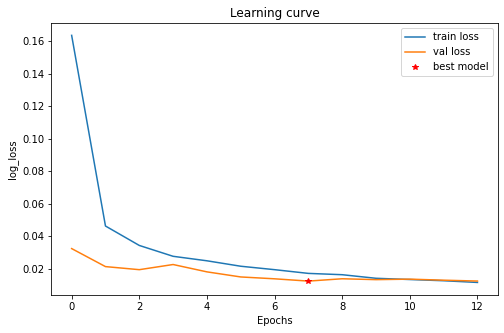

In [ ]:
learning_curve_plot(drop_batch_result)

In [ ]:
test_accuracy(drop_batch_model)

accuracy on test data:  0.9818


## Discussion
In previous section we investigate the effect of adding Dropout and Batchnormalizaiton. for more intution we bring together all the results as following.

Dropout  | Batch normalization | acuuracy
-------------------|------------------|-------------------
OFF      | OFF |97.65
ON       | OFF |98.13
OFF      | ON  |98.27
ON       | ON  |98.18    

It 's obvious that adding these regularization terms (dropout and batch normalization) will improve the accuracy. \\
Besides for choose the best model we use early stopping algorithm for pick up optimum model with respect to validation loss.

# CONVOLUTIONAL NEURAL NETWORKS (CNNs)

In this section we are going to develop a CNN model for MNIST classification and have a comparision with MLP performance on this task.

## Define network

In [ ]:
def conv_layer(x, filter_num = 64, kernel_size = 3, stride = 2, dil = 1):
  x = Conv2D(filters=filter_num, kernel_size=(kernel_size, kernel_size),
             strides=stride, dilation_rate=dil, kernel_initializer="he_normal")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(filters=filter_num, kernel_size=(kernel_size, kernel_size),
             strides=stride, dilation_rate=dil, kernel_initializer="he_normal")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  return x

def cnn_classification(inp):
  x = conv_layer(inp, filter_num = 16, kernel_size = 3, stride = 1, dil = 1)
  x = conv_layer(x, filter_num = 32, kernel_size = 3, stride = 1, dil = 1)
  x = MaxPooling2D((2, 2)) (x)
  x = conv_layer(x, filter_num = 64, kernel_size = 3, stride = 1, dil = 1)
  x = conv_layer(x, filter_num = 128, kernel_size = 3, stride = 1, dil = 1)
  x = Flatten()(x)
  out = Dense(10,activation='softmax')(x)
  model = Model(inputs=[inp], outputs=[out])
  return model


In [ ]:
inp = Input((28,28,1), name='img')
cnn_model = cnn_classification(inp)
cnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_64 (Bat  (None, 26, 26, 16)       64        
 chNormalization)                                                
                                                                 
 activation_64 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 conv2d_73 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 batch_normalization_65 (Bat  (None, 24, 24, 16)       64        
 chNormalization)                                          

## Data preparation and training

Previously we prepared train_img and val_img data sets for MLP. In this part we need 2D images to perform convolution thus we reshape the tensors to have shape of `(None, 28, 28, 1)`. \\
Onehot labels keep its dimensions.

In [ ]:
cnn_train_img = train_img.reshape([-1,28,28,1])
cnn_val_img = val_img.reshape([-1,28,28,1])

In [ ]:
# define useful functions to prevent repeat the same codes
def compile_train_cnn_classifier(model):
  es = EarlyStopping(monitor='val_loss', patience=5)
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  result = model.fit(cnn_train_img,onehot_train, batch_size=64,
                               epochs=50,  validation_data=(cnn_val_img, onehot_val),
                               callbacks=[es])
  return model, result

def test_accuracy_cnn(model, test_data):
  prediction = model.predict(test_data)
  predicted_num = np.argmax(prediction,axis=1)
  tp = 0
  for i in range(len(predicted_num)):
    if (predicted_num[i] == y_test[i]):
      tp +=1

  print('accuracy on test data: ', tp/len(predicted_num))

def learning_curve_plot(result):
  plt.figure(figsize=(8,5))
  plt.title("Learning curve")
  plt.plot(result.history["loss"], label="loss")
  plt.plot(result.history["val_loss"], label="val_loss")
  plt.plot(np.argmin(np.array(result.history["val_loss"])),np.min(np.array(result.history["val_loss"])), 'r*')
  plt.xlabel("Epochs")
  plt.ylabel("log_loss")
  plt.legend(['train loss', 'val loss', 'best model'])

In [ ]:
cnn_model, cnn_result = compile_train_cnn_classifier(cnn_model)

Epoch 1/50
844/844 [==============================] - 16s 8ms/step - loss: 0.0262 - accuracy: 0.9630 - val_loss: 0.0107 - val_accuracy: 0.9837
Epoch 2/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0079 - accuracy: 0.9879 - val_loss: 0.0067 - val_accuracy: 0.9898
Epoch 3/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0058 - accuracy: 0.9912 - val_loss: 0.0068 - val_accuracy: 0.9907
Epoch 4/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0047 - accuracy: 0.9927 - val_loss: 0.0059 - val_accuracy: 0.9905
Epoch 5/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0041 - accuracy: 0.9941 - val_loss: 0.0043 - val_accuracy: 0.9940
Epoch 6/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0035 - accuracy: 0.9950 - val_loss: 0.0051 - val_accuracy: 0.9923
Epoch 7/50
844/844 [==============================] - 7s 8ms/step - loss: 0.0034 - accuracy: 0.9950 - val_loss: 0.0069 - val_accuracy: 0.9910
Epoch

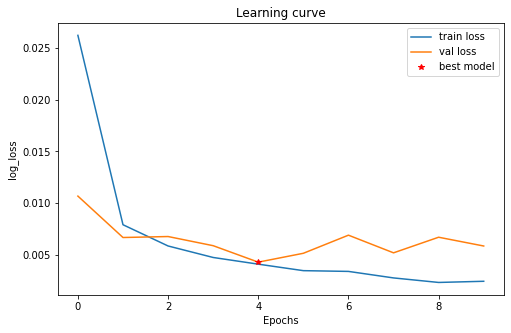

In [ ]:
learning_curve_plot(cnn_result)

In [ ]:
x_t = tf.expand_dims(norm_x_test, axis=3)
test_accuracy_cnn(cnn_model, x_t)

accuracy on test data:  0.9912


## Discussion
In comparision with MLP networks CNNs use shared parameters and capable with extraction of patterns in the images. This features conclude in lower number of parameters and higher accuracy.

network name  | num. of parameters | accuracy
-------------------|------------------|------------------
MLP (with BN)      | 729,000|98.27 
CNN       | 300,000|99.12

# Contact me!!
If you have questions, please feel free to ask. \\
`RezaKarimzadeh1996@gmail.com`